In [1481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1532]:
df1 = pd.read_csv(r'C:\Users\talia\OneDrive\שולחן העבודה\data science project\car details regresion.csv')
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Let us get rid of the unnecessary features.\
While looking for a car to buy most people dont mind about the torque, so let us use the main features.

In [1533]:
df1.drop(['torque'], axis = 1, inplace = True)
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [1534]:
df1.shape

(8128, 12)

In [1535]:
df1.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [1546]:
df1.dropna(inplace=True)
df1.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [1552]:
df1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [1553]:
df1.head(14)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [1554]:
df1['seats'].value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [1555]:
df1['year'].value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      16
1999      14
1997       9
1998       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64

In [1556]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


In [1557]:
over_2500000=df1.loc[df1['selling_price']>2500000]
over_2500000.count()

name             299
year             299
selling_price    299
km_driven        299
fuel             299
seller_type      299
transmission     299
owner            299
mileage          299
engine           299
max_power        299
seats            299
dtype: int64

In [1558]:
df=df1
df = df[df['selling_price']<2500000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7604 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7604 non-null   object 
 1   year           7604 non-null   int64  
 2   selling_price  7604 non-null   int64  
 3   km_driven      7604 non-null   int64  
 4   fuel           7604 non-null   object 
 5   seller_type    7604 non-null   object 
 6   transmission   7604 non-null   object 
 7   owner          7604 non-null   object 
 8   mileage        7604 non-null   object 
 9   engine         7604 non-null   object 
 10  max_power      7604 non-null   object 
 11  seats          7604 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 772.3+ KB


Text(0.5, 1.0, 'Distributional of price')

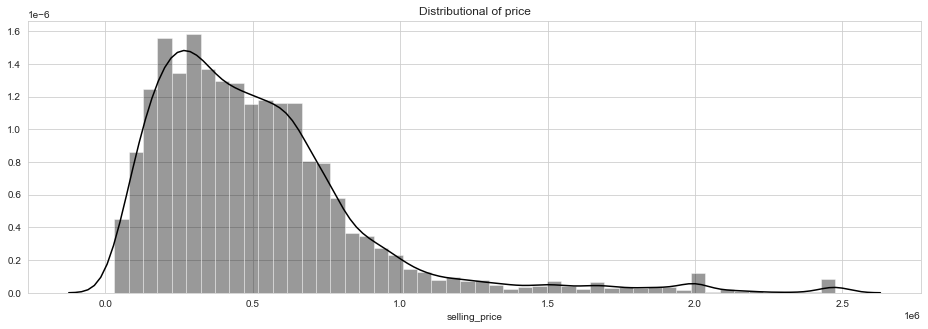

In [1559]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["selling_price"], color="black",ax = axes)
plt.title("Distributional of price")

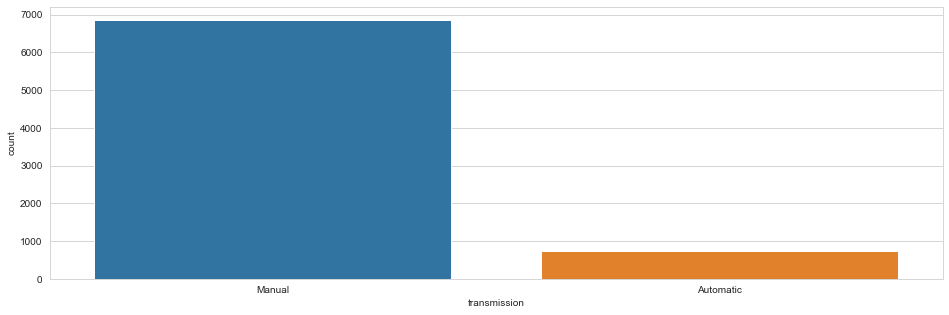

In [1560]:
plt.figure(figsize = (16,5))
sns.countplot(x = df['transmission'])

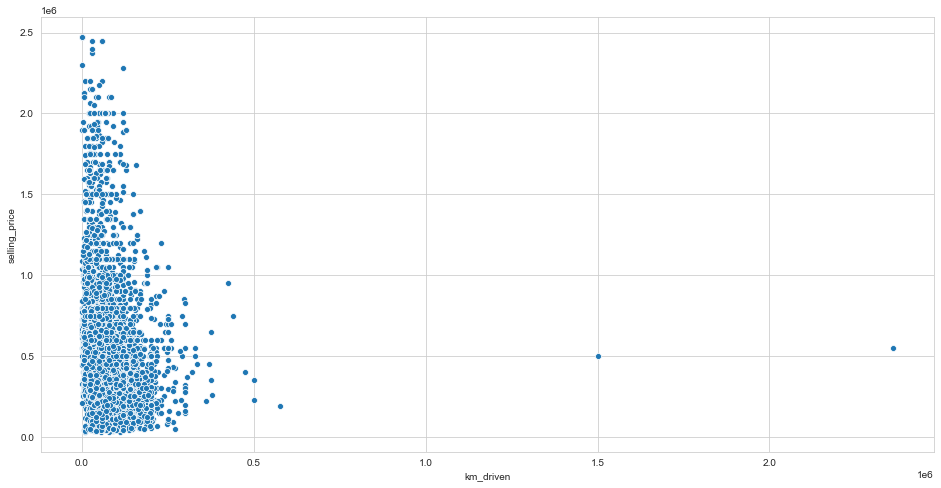

In [1561]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df["km_driven"], y = df["selling_price"])

In [1562]:
over_1500000=df.loc[df['km_driven']>=1500000]
over_1500000.count()

name             2
year             2
selling_price    2
km_driven        2
fuel             2
seller_type      2
transmission     2
owner            2
mileage          2
engine           2
max_power        2
seats            2
dtype: int64

In [1563]:
df2=df
df2 = df2[df2['km_driven']<1500000]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7602 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7602 non-null   object 
 1   year           7602 non-null   int64  
 2   selling_price  7602 non-null   int64  
 3   km_driven      7602 non-null   int64  
 4   fuel           7602 non-null   object 
 5   seller_type    7602 non-null   object 
 6   transmission   7602 non-null   object 
 7   owner          7602 non-null   object 
 8   mileage        7602 non-null   object 
 9   engine         7602 non-null   object 
 10  max_power      7602 non-null   object 
 11  seats          7602 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 772.1+ KB


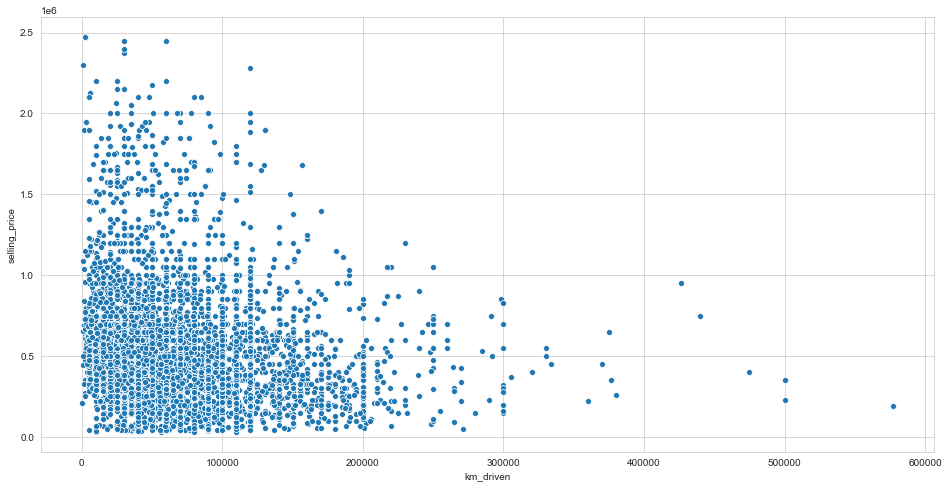

In [1564]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df2["km_driven"], y = df2["selling_price"])

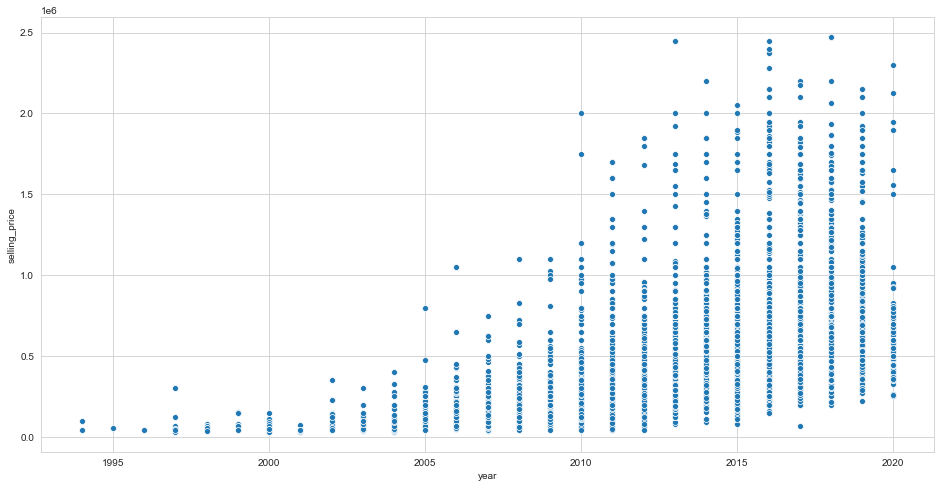

In [1565]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df2["year"], y = df2["selling_price"])

In [1566]:
under_1995=df.loc[df['year'] < 1995]
under_1995.count()

name             2
year             2
selling_price    2
km_driven        2
fuel             2
seller_type      2
transmission     2
owner            2
mileage          2
engine           2
max_power        2
seats            2
dtype: int64

In [1567]:
df3=df
df3 = df3[df3['year'] > 1995]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7601 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7601 non-null   object 
 1   year           7601 non-null   int64  
 2   selling_price  7601 non-null   int64  
 3   km_driven      7601 non-null   int64  
 4   fuel           7601 non-null   object 
 5   seller_type    7601 non-null   object 
 6   transmission   7601 non-null   object 
 7   owner          7601 non-null   object 
 8   mileage        7601 non-null   object 
 9   engine         7601 non-null   object 
 10  max_power      7601 non-null   object 
 11  seats          7601 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 772.0+ KB


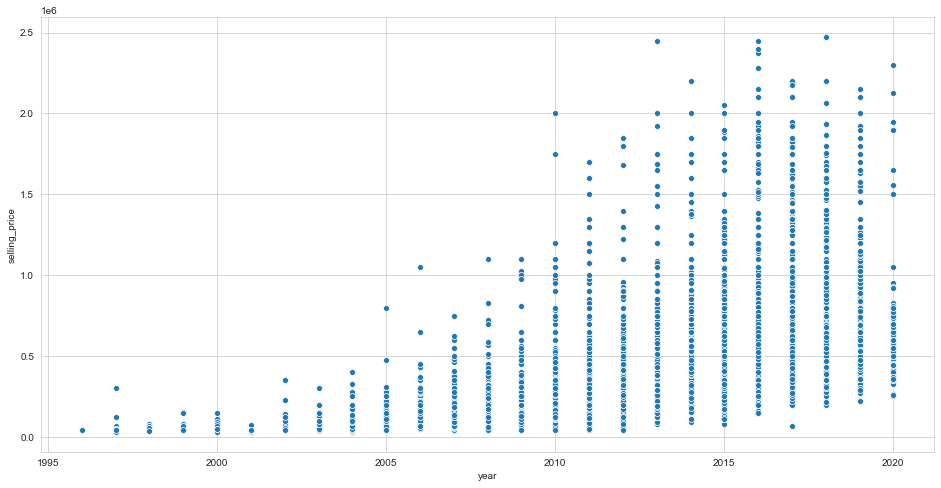

In [1568]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = df3["year"], y = df3["selling_price"])

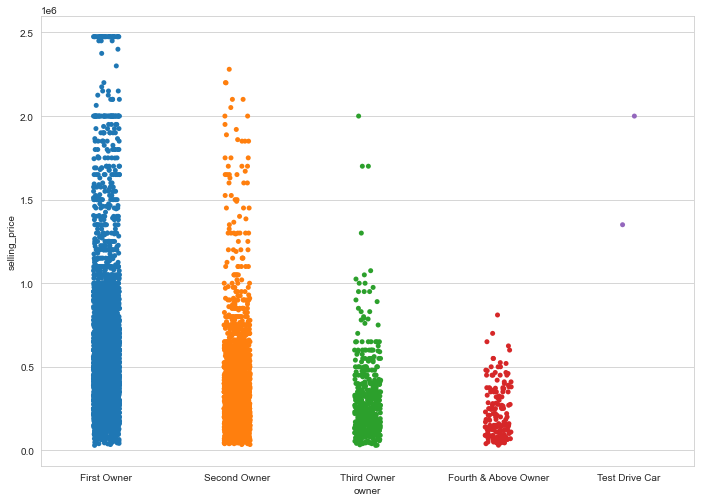

In [1569]:
var = 'owner'
f1, ax = plt.subplots()
f1.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='selling_price', data = df3) 

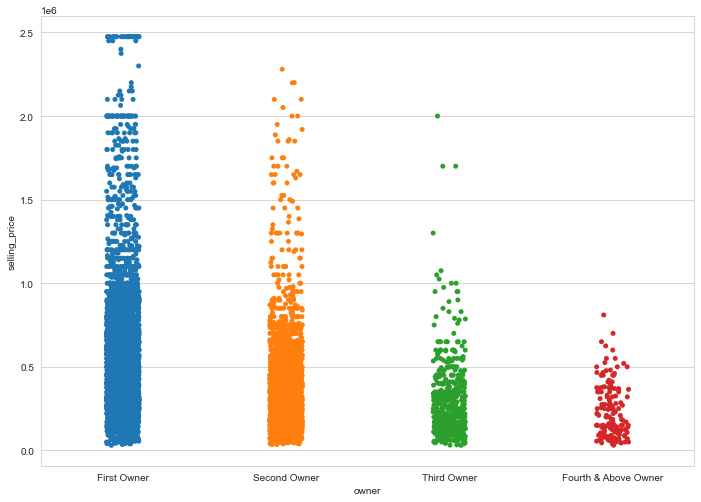

In [1570]:
df3 = df3[df3.owner != "Test Drive Car"] 
var = 'owner'
f1, ax = plt.subplots()
f1.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='selling_price', data = df3) 

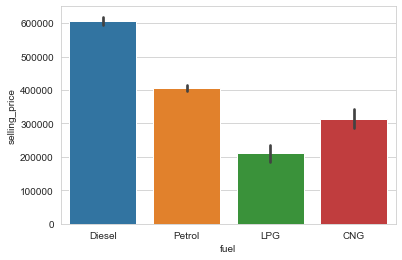

In [1571]:
sns.barplot('fuel', 'selling_price', data = df3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

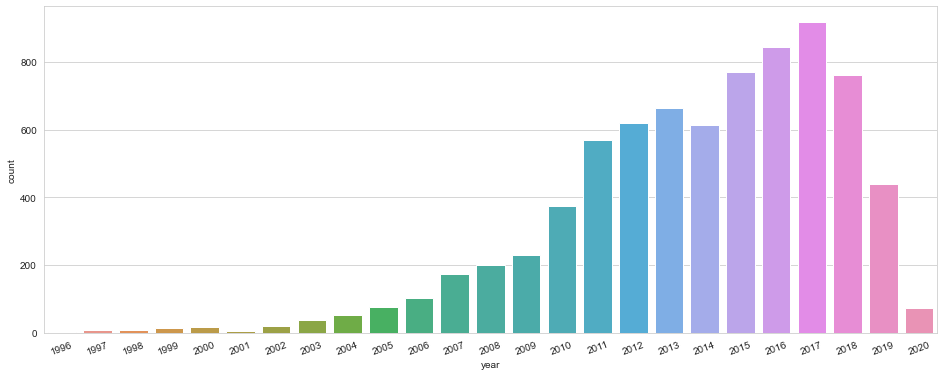

In [1572]:
plt.figure(figsize = (16,6))
sns.countplot(df3['year'])
plt.xticks(rotation = 20)
# majority cars present on the site were brought in the year 2017

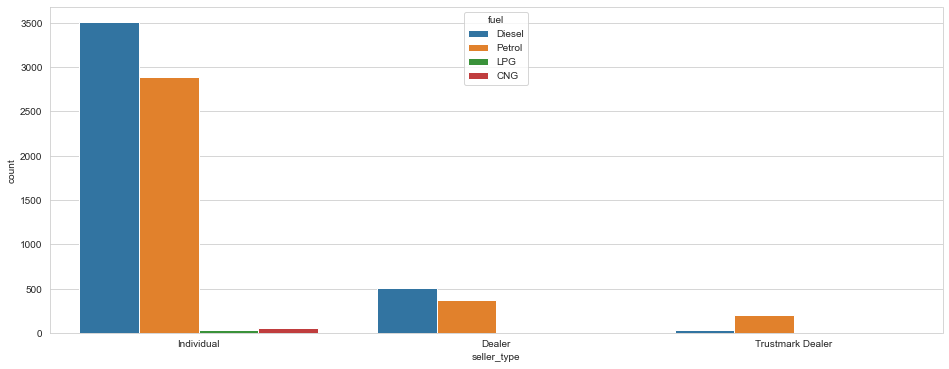

In [1573]:
plt.figure(figsize = (16,6))
sns.countplot(df3['seller_type'], hue = df3['fuel'])
# individual sellers mostly sell cars of fuel type diesel and petrol

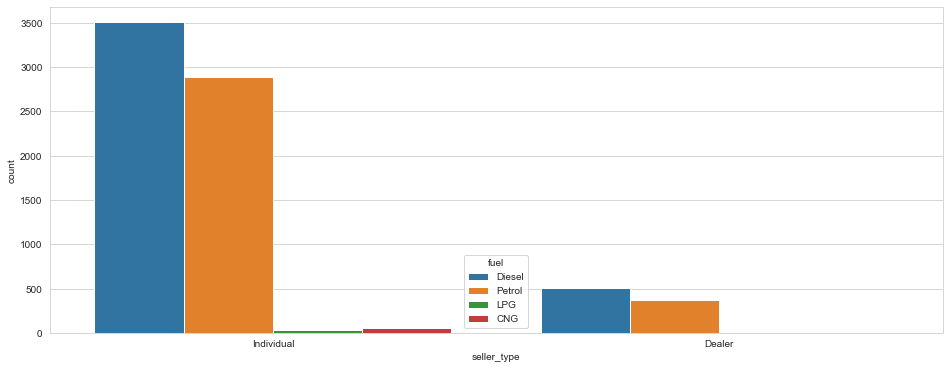

In [1574]:
df3 = df3[df3.seller_type != "Trustmark Dealer"] 
plt.figure(figsize = (16,6))
sns.countplot(df3['seller_type'], hue = df3['fuel'])

# Normalize the data

In [1575]:
df3['fuel'] = df3['fuel'].replace('Diesel','1', regex=True) 
df3['fuel'] = df3['fuel'].replace('Petrol',"2", regex=True) 
df3['fuel'] = df3['fuel'].replace('LPG','3', regex=True) 
df3['fuel'] = df3['fuel'].replace('CNG','4', regex=True) 

df3['owner'] = df3['owner'].replace('First Owner','1', regex=True)
df3['owner'] = df3['owner'].replace('Second Owner','2', regex=True)
df3['owner'] = df3['owner'].replace('Third Owner','3', regex=True)
df3['owner'] = df3['owner'].replace('Fourth & Above Owner','4', regex=True)

df3['transmission'] = df3['transmission'].replace('Manual','1', regex=True)
df3['transmission'] = df3['transmission'].replace('Automatic','2', regex=True)

df3['seller_type'] = df3['seller_type'].replace('Individual','1', regex=True)
df3['seller_type'] = df3['seller_type'].replace('Dealer','2', regex=True)

df3['selling_price'] = df3['selling_price'].apply(lambda x : x/10000)

df3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,45.0,145500,1,1,1,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,37.0,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,15.8,140000,2,1,1,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,22.5,127000,1,1,1,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,13.0,120000,2,1,1,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,32.0,110000,2,1,1,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,13.5,119000,1,1,1,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,38.2,120000,1,1,1,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,29.0,25000,1,1,1,1,23.57 kmpl,1396 CC,70 bhp,5.0


# Modeling
### linear regression model

Here we are seeing that Mileage,Engine and Power are object type and specific units are also presented in the dataset,that's why before fitting into model we have to perform some cleaning. \
Also let's have the only Company name from the name column.

In [1576]:
df3['engine'] = df3['engine'].str.split().str[0]
df3['max_power'] = df3['max_power'].str.split().str[0]

In [1577]:
df3['mileage']= df3['mileage'].str[:-5]
df3['mileage']= df3['mileage'].astype(float);

In [1578]:
df3.drop(['name'], axis = 1, inplace = True)
df3.head(7)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,45.0,145500,1,1,1,1,23.40,1248,74,5.0
1,2014,37.0,120000,1,1,1,2,21.14,1498,103.52,5.0
2,2006,15.8,140000,2,1,1,3,17.70,1497,78,5.0
3,2010,22.5,127000,1,1,1,1,23.00,1396,90,5.0
4,2007,13.0,120000,2,1,1,1,16.10,1298,88.2,5.0
5,2017,44.0,45000,2,1,1,1,20.14,1197,81.86,5.0
6,2007,9.6,175000,3,1,1,1,17.30,1061,57.5,5.0


In [1592]:
df3['fuel']= df3['fuel'].astype(float);
df3['seller_type']= df3['seller_type'].astype(float);
df3['transmission']= df3['transmission'].astype(float);
df3['owner']= df3['owner'].astype(float);
df3['engine']= df3['engine'].astype(float);
df3 = df3[df3.max_power != 'bhp'] 
df3['max_power']= df3['max_power'].astype(float);

# train-test split:

In [1580]:
from sklearn.model_selection import train_test_split
train = df3.drop('selling_price', axis=1)
test = df3["selling_price"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=42)

In [1581]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1582]:
print('LinearRegression score:' , + lr.score(X_test,y_test))

LinearRegression score: 0.6950294533725511


In [1583]:
y_pred = lr.predict(X_test)
mse_model = mean_squared_error(y_pred, y_test)
print('Mean Squared Error on test data: ', + mse_model)
rmse_model = np.sqrt(mean_squared_error(y_pred, y_test))
print('Root Mean Squared Error:', + rmse_model)

Mean Squared Error on test data:  390.289362072804
Root Mean Squared Error: 19.755742508769547


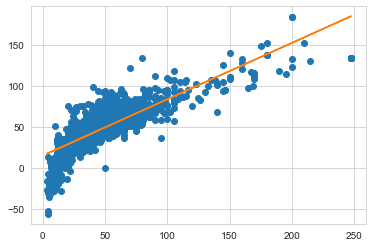

In [1584]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b)

### dummy model

In [1585]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(train, test)
dummy_pred = lr.predict(train)
print('Dummy LinearRegression score:', + dummy_regr.score(train, test))

Dummy LinearRegression score: -0.03620813131261591


In [1586]:
mse_dummy = mean_squared_error(dummy_pred, test)
print('Mean Squared Error on test data: ', + mse_dummy)
rmse_dummy = np.sqrt(mean_squared_error(dummy_pred, test))
print('Root Mean Squared Error:', + rmse_dummy)

Mean Squared Error on test data:  393.4517194251641
Root Mean Squared Error: 19.835617445019555


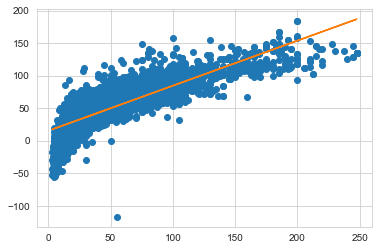

In [1587]:
plt.plot(test, dummy_pred, 'o')
ln, b = np.polyfit(test, dummy_pred,1)
plt.plot(test,ln*test+b)

### Random Forest Regressor model

In [1588]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print('RandomForestRegressor score:' , + rf_reg.score(X_test,y_test))

RandomForestRegressor score: 0.9226909420111942


In [1589]:
mse_rf = mean_squared_error(y_pred, y_test)
print('Mean Squared Error on test data: ', + mse_rf)
rmse_rf = np.sqrt(mean_squared_error(y_pred, y_test))
print('Root Mean Squared Error:', + rmse_rf)

Mean Squared Error on test data:  98.93710477477542
Root Mean Squared Error: 9.946713264932061


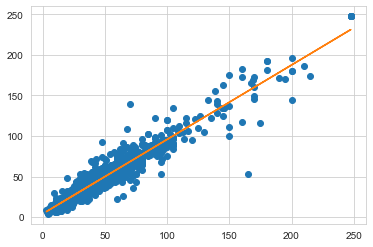

In [1590]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b)

# well, we can see that there is an improvment with this model!